In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ghibtools as gh
import pandas as pd
import seaborn as sns
import pingouin as pg
from params import *
from bibliotheque import *
from configuration import *

from compute_global_dataframes import hrv_concat_job, resp_features_concat_job

In [4]:
save_folder = base_folder / 'Figures' / 'Autres' / 'jcs'

In [8]:
concat = []
for participant in subject_keys:
    ses01_folder = base_folder / 'Raw_Data' / f'{participant}' / 'questionnaires' / 'ses01'
    df_participant = pd.read_excel(ses01_folder /  f'cotations_odeurs_relatives_{participant}_bis.xlsx')
    concat.append(df_participant)
cotations_relatives_odeurs = pd.concat(concat)

In [10]:
cotations_relatives_odeurs

,Unnamed: 0,participant,odeur_num,odeur_label,odeur_name,hédonicité_absolue_brute,hédonicité_absolue,longueur_totale,intensité_relative_brute,intensité_relative,hédonicité_relative_brute,hédonicité_relative,eveil_relatif_brute,eveil_relatif,familarité_relative_brute,familiarité_relative,valence_émotionnelle_relative_brute,valence_émotionnelle_relative
0,0,P01,1,FO,Feuille d’Olivier,74,0.74,100,33,0.33,82,0.82,65,0.65,38,0.38,74,0.74
1,1,P01,2,FP,Floral Printanier,85,0.85,100,87,0.87,85,0.85,74,0.74,77,0.77,86,0.86
2,2,P01,5,FoE,Fleur d’Oranger Epicée,77,0.77,100,21,0.21,77,0.77,9,0.09,24,0.24,80,0.80
0,0,P02,4,PL,Pêche Lavande,94,0.94,100,78,0.78,87,0.87,96,0.96,91,0.91,79,0.79
1,1,P02,7,V,Vanille,95,0.95,100,96,0.96,93,0.93,17,0.17,95,0.95,95,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,1,P30,6,FC,Fleur de coton,92,0.92,100,9,0.09,61,0.61,4,0.04,61,0.61,53,0.53
2,2,P30,7,V,Vanille,91,0.91,100,88,0.88,68,0.68,90,0.90,80,0.80,65,0.65
0,0,P31,2,FP,Floral Printanier,98,0.98,100,60,0.60,80,0.80,71,0.71,73,0.73,66,0.66
1,1,P31,4,PL,Pêche Lavande,94,0.94,100,66,0.66,89,0.89,82,0.82,99,0.99,82,0.82


In [17]:
label_odeurs_choisies = {}
for p in cotations_relatives_odeurs['participant'].unique():
    df_p = cotations_relatives_odeurs[cotations_relatives_odeurs['participant'] == p]
    label_odeurs_choisies[p] = df_p.sort_values(by = 'hédonicité_relative')['odeur_name'][0]

In [20]:
odeurs_choisies = cotations_relatives_odeurs.groupby('participant').max(True).iloc[:,2:].reset_index()
odeurs_choisies['Stimulus'] = 'Odor'
odeurs_choisies['Odor_Label'] = odeurs_choisies['participant'].map(label_odeurs_choisies)
odeurs_choisies

,participant,hédonicité_absolue_brute,hédonicité_absolue,longueur_totale,intensité_relative_brute,intensité_relative,hédonicité_relative_brute,hédonicité_relative,eveil_relatif_brute,eveil_relatif,familarité_relative_brute,familiarité_relative,valence_émotionnelle_relative_brute,valence_émotionnelle_relative,Stimulus,Odor_Label
0,P01,85,0.85,100,87,0.87,85,0.85,74,0.74,77,0.77,86,0.86,Odor,Feuille d’Olivier
1,P02,96,0.96,100,96,0.96,99,0.99,96,0.96,99,0.99,99,0.99,Odor,Pêche Lavande
2,P03,100,1.00,100,86,0.86,80,0.80,100,1.00,100,1.00,83,0.83,Odor,Rose
3,P04,86,0.86,100,65,0.65,81,0.81,51,0.51,76,0.76,84,0.84,Odor,Floral Printanier
4,P05,95,0.95,100,73,0.73,86,0.86,83,0.83,91,0.91,92,0.92,Odor,Pêche Lavande
5,P06,89,0.89,100,95,0.95,87,0.87,90,0.90,81,0.81,91,0.91,Odor,Floral Printanier
6,P07,97,0.97,100,96,0.96,93,0.93,84,0.84,97,0.97,100,1.00,Odor,Floral Printanier
7,P08,94,0.94,100,84,0.84,87,0.87,64,0.64,70,0.70,90,0.90,Odor,Floral Printanier
8,P09,99,0.99,100,59,0.59,94,0.94,85,0.85,26,0.26,88,0.88,Odor,Floral Printanier
9,P10,96,0.96,100,98,0.98,97,0.97,92,0.92,94,0.94,96,0.96,Odor,Feuille d'Olivier


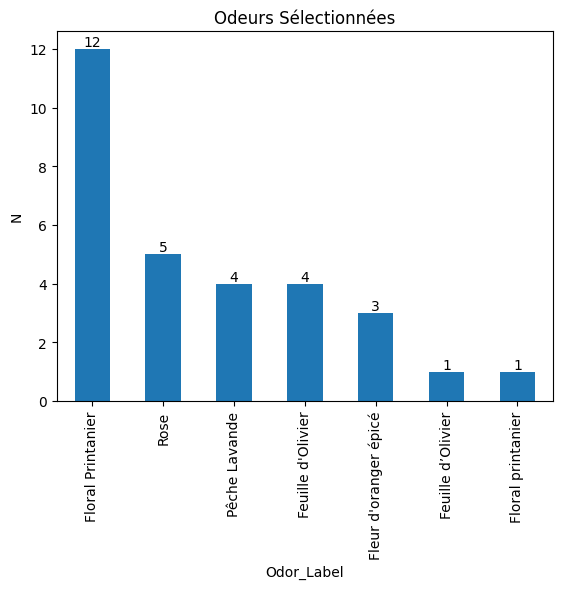

In [24]:
fig, ax = plt.subplots()
odeurs_choisies['Odor_Label'].value_counts().plot.bar(ax=ax)
for bar in ax.containers:
    ax.bar_label(bar)
ax.set_title('Odeurs Sélectionnées')
ax.set_ylabel('N')
fig.savefig(save_folder / 'odeurs_choisies_emosens3.png')
plt.show()

# Odeurs et coeur

In [25]:
hrv = hrv_concat_job.get(global_key).to_dataframe()
hrv = hrv[hrv['session'] == 'odor']
hrv['Odor_Label'] = hrv['participant'].map(label_odeurs_choisies)
hrv

,participant,session,HRV_Mean,HRV_SD,HRV_Median,HRV_Mad,HRV_CV,HRV_MCV,HRV_Asymmetry,HRV_RMSSD,stai_state,stai_trait,Gender,Maia_Mean,OAS,BMRQ,Odor_Label
dim_0,,,,,,,,,,,,,,,,,
2,P01,odor,767.753989,91.021796,759.5,52.632379,0.118556,0.069299,-8.253989,88.464355,40,61,F,1.019643,2.666667,2.727273,Feuille d’Olivier
5,P02,odor,740.212598,99.500337,722.5,112.677769,0.134421,0.155955,-17.712598,67.882486,24,37,F,3.354762,3.066667,3.000000,Pêche Lavande
8,P03,odor,815.740136,82.597783,814.0,81.543122,0.101255,0.100176,-1.740136,78.976706,20,24,F,3.664583,3.266667,3.136364,Rose
11,P04,odor,789.043421,55.528532,794.0,54.856282,0.070374,0.069089,4.956579,38.700056,27,33,F,3.196429,3.000000,3.227273,Floral Printanier
14,P05,odor,909.593323,86.862903,894.0,74.130111,0.095496,0.082920,-15.593323,53.851860,27,21,M,4.107738,3.200000,3.227273,Pêche Lavande
17,P06,odor,1041.115385,121.967856,1041.0,114.901672,0.117151,0.110376,-0.115385,94.988270,29,32,F,3.303869,2.966667,3.045455,Floral Printanier
20,P07,odor,784.826999,106.342649,764.0,134.916802,0.135498,0.176593,-20.826999,70.432149,24,35,F,2.342262,3.133333,3.000000,Floral Printanier
23,P08,odor,814.301630,111.874366,810.0,143.812415,0.137387,0.177546,-4.301630,72.418155,21,22,F,2.367857,2.900000,2.590909,Floral Printanier
26,P09,odor,932.718069,91.302380,958.0,77.095315,0.097889,0.080475,25.281931,43.489612,55,53,F,2.391667,2.833333,2.818182,Floral Printanier


In [26]:
hrv['Heart_Rate'] = 60000 / hrv['HRV_Median']

In [29]:
hrv['Odor_Label'].unique()

array(['Feuille d’Olivier', 'Pêche Lavande', 'Rose', 'Floral Printanier',
       "Feuille d'Olivier", "Fleur d'oranger épicé", 'Floral printanier'],
      dtype=object)

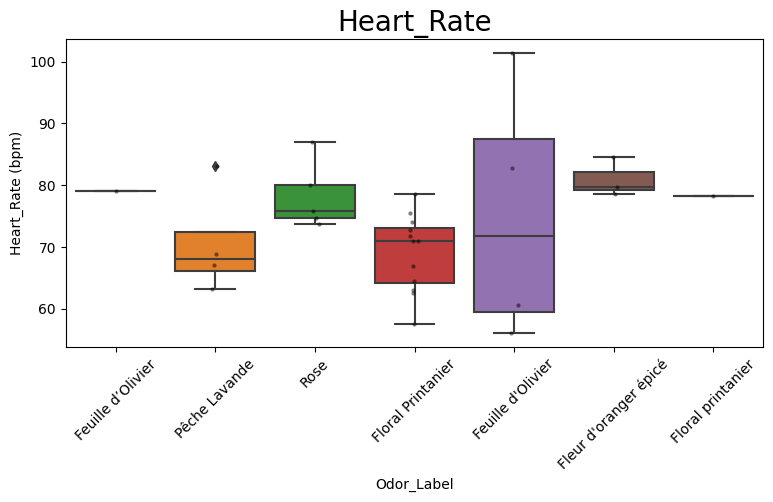

In [30]:
order = ['Feuille d’Olivier', 'Pêche Lavande', 'Rose', 'Floral Printanier',
       "Feuille d'Olivier", "Fleur d'oranger épicé", 'Floral printanier']
y = 'Heart_Rate'
fig, ax = plt.subplots(figsize = (9,4))
sns.boxplot(data = hrv,
           x = 'Odor_Label',
           y = y,
           ax=ax,
            order=order
          )
sns.stripplot(data = hrv,
           x = 'Odor_Label',
           y = y,
           ax=ax,
             color = 'k', alpha = 0.5, size = 3, jitter = 0.05,
            order=order
          )
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.set_title(y, fontsize = 20)
ax.set_ylabel(f'{y} (bpm)')
fig.savefig(save_folder / 'coeur_hr_emosens3.png', dpi = 500, bbox_inches = 'tight')
plt.show()

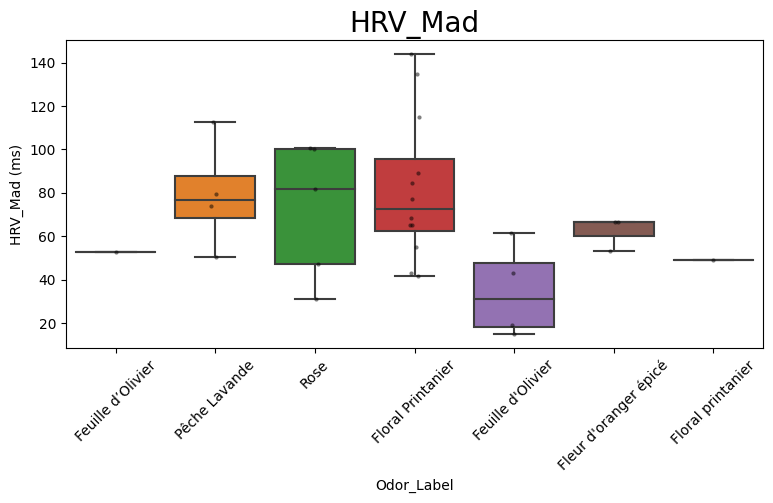

In [31]:

y = 'HRV_Mad'
fig, ax = plt.subplots(figsize = (9,4))
sns.boxplot(data = hrv,
           x = 'Odor_Label',
           y = y,
           ax=ax,
            order = order
          )
sns.stripplot(data = hrv,
           x = 'Odor_Label',
           y = y,
           ax=ax,
             color = 'k', alpha = 0.5, size = 3, jitter = 0.05,
            order = order
          )
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.set_title(y, fontsize = 20)
ax.set_ylabel(f'{y} (ms)')
fig.savefig(save_folder / 'coeur_hrvmad_emosens3.png', dpi = 500, bbox_inches = 'tight')
plt.show()

# Odeurs et respi

In [36]:
resp['session'].unique()

array(['odor'], dtype=object)

In [41]:
resp = resp_features_concat_job.get(global_key).to_dataframe()
resp = resp[resp['session'] == 'odor']
resp['Odor_Label'] = resp['participant'].map(label_odeurs_choisies)
resp = resp.groupby(['participant','Odor_Label']).median(True).reset_index()

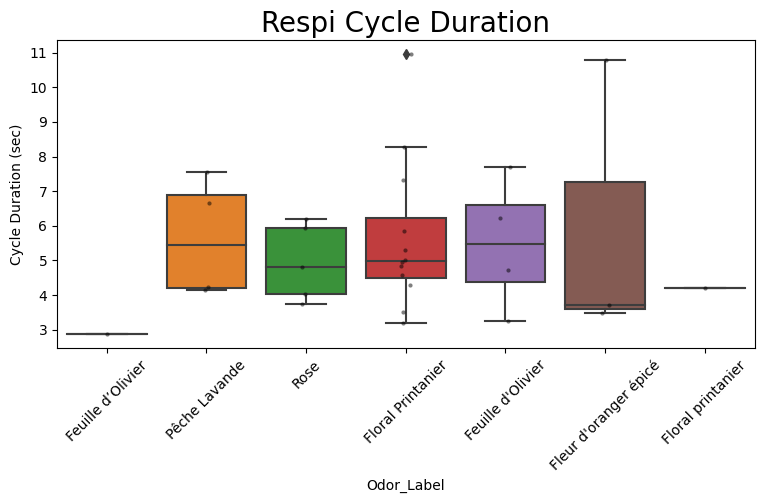

In [43]:
y = 'cycle_duration'
fig, ax = plt.subplots(figsize = (9,4))
sns.boxplot(data = resp,
           x = 'Odor_Label',
           y = y,
           ax=ax,
            order = order
          )
sns.stripplot(data = resp,
           x = 'Odor_Label',
           y = y,
           ax=ax,
             color = 'k', alpha = 0.5, size = 3, jitter = 0.05,
            order = order
          )
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.set_title('Respi Cycle Duration', fontsize = 20)
ax.set_ylabel(f'Cycle Duration (sec)')
fig.savefig(save_folder / 'resp_emosens3.png', dpi = 500, bbox_inches = 'tight')
plt.show()